# Test file 1

This ipynb file has been created for testing that
- importing the eis_toolkit package works
- executing functions in eis_toolkit works
- dependencies work

*DISCLAIMER*. Any of the functionalities utilizing GDAL functions will not work when testing eis_toolkit **outside of QGIS's Python console** unless you have separately taken care of installing GDAL library.

## General instructions

Do not install any packages by yourself! We want to make this work so that the user needs only run
```
pip install eis_toolkit
```
once and everything should work!

The GDAL problem will be resolved automatically when we use call eis_toolkit functions from QGIS's python.

## Dummy tests

### Arithmetic dummy functions

In [25]:
from eis_toolkit.dependency_test.dummy import test_function
from eis_toolkit.dependency_test.dummy import test_function2

In [15]:
test_function(2,4)

6

In [16]:
test_function2(19)

14

These worked fine!

Note that above we created own import command for both functions. The other option would have been to
```
from eis_toolkit.dependency_test import dummy

dummy.test_function(1,2)
dummy.test_function2(25)
```

### Dependency tests

In [17]:
from eis_toolkit.dependency_test import dummy_sklearn

In [21]:
import numpy as np

x = np.array(
    [
        [1.0, 2.0, 3.0],
        [2.0, 2.0, 6.0]
    ]
)

In [23]:
dummy_sklearn.sk_mean(x)

array([1.5, 2. , 4.5])

This worked fine!

In [24]:
from eis_toolkit.dependency_test import dummy_gdal

ModuleNotFoundError: No module named 'osgeo'

This did not work!

## Test and experiment with dependent libraries in general

In addition to using and testing the functionality of eis_toolkit, you can also use the notebooks to experiment with the libraries that eis_toolkit depends on. This could come in handy for exploring new functionalities.

For example, these imports work:

In [151]:
import numpy as np
import matplotlib.pyplot as plt

But of course, what we can import is limited to the virtual environment we're in:

In [154]:
# This fails
import django

ModuleNotFoundError: No module named 'django'

In [58]:
def plot_random():
    """generate a plot of randomness"""
    
    fig, ax = plt.subplots()
    ax.plot(np.random.rand(15,2))

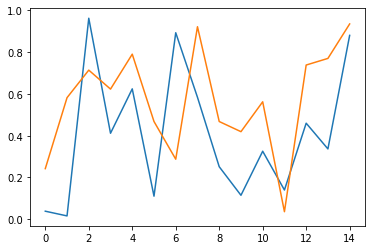

In [59]:
plot_random()

You can use external data as well:

In [79]:
import geopandas as gpd

world = gpd.read_file("./example_data/shp/naturalearth/")

In [148]:
def scatter(df, x, y):
    
    fig, ax = plt.subplots(figsize=(15, 10))
    df.plot(ax=ax, x=x, y=y, kind="scatter")

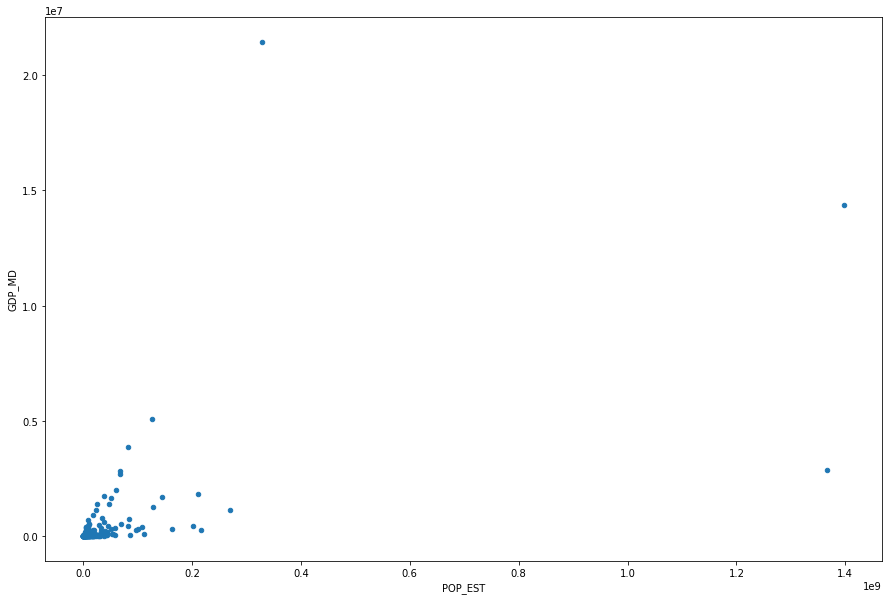

In [150]:
scatter(
    df=world,
    x="POP_EST",
    y="GDP_MD",
)

> Eemil

Täällä voisi vaikka
- generoida hatusta dataa ja luoda jonkin plotin siitä
- käyttää geopandasia (tätä varten voisi lisätä jonkin testidata kansion)
- luoda esimerkin jostain PyPin kautta asennettavasta Python kirjastosta, joka ei sisälly meidän riippuvuuksiin ja demonstroida, että sen kutsuminen tuottaa virheilmoituksen